In [1]:
# import libraries and modules

import torch

from setup import *

from axis_angle import *

from axis_angle_analysis import *

In [2]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# TEAPOT

In [3]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


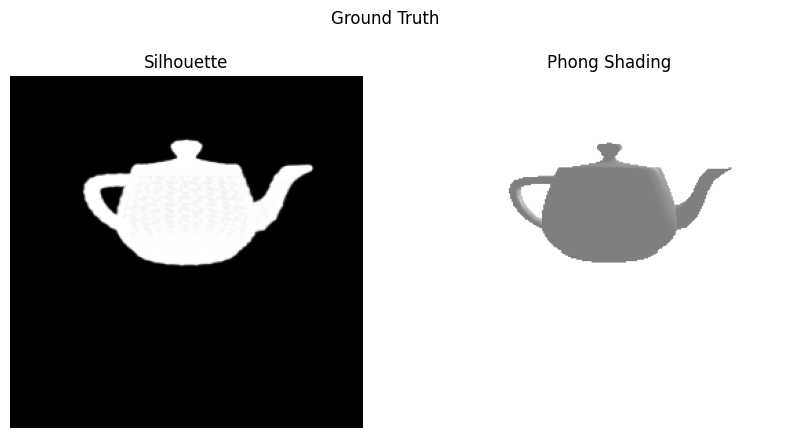

In [4]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

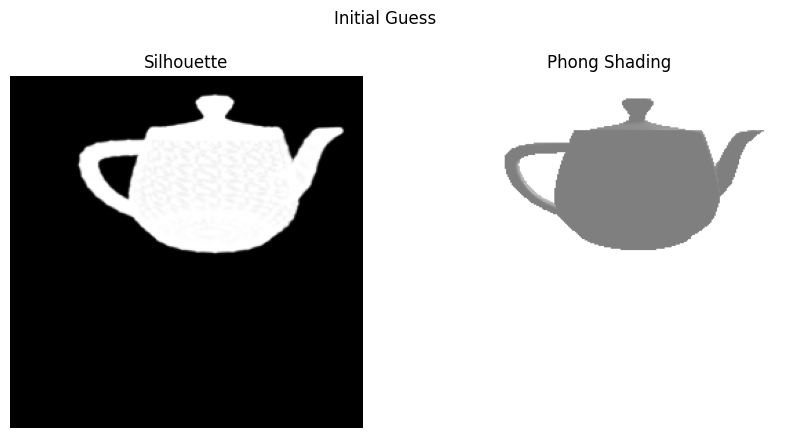

In [5]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)
plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

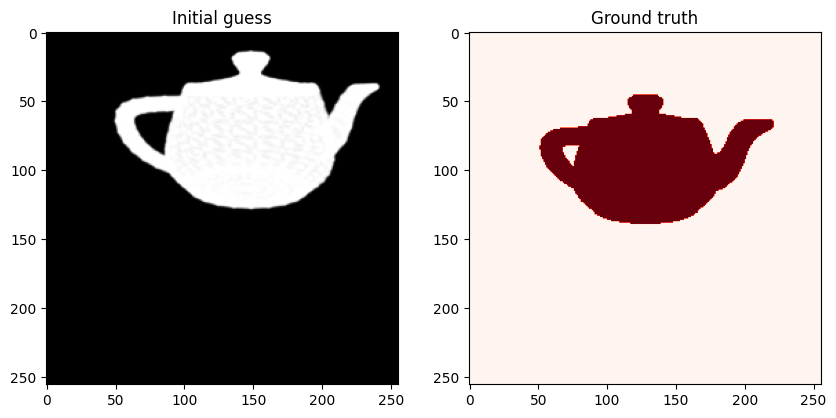

  0%|          | 0/15 [00:10<?, ?it/s]

iteration: 0, loss: 6865.83984375


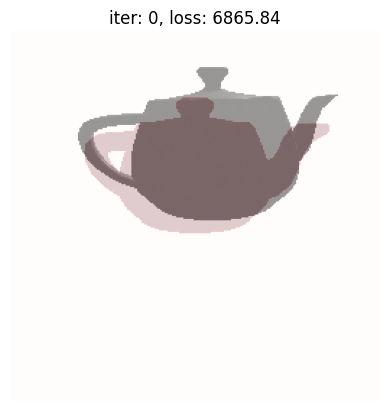

 13%|█▎        | 2/15 [00:21<02:15, 10.41s/it]

iteration: 1, loss: 4828.15185546875


 20%|██        | 3/15 [00:30<02:01, 10.12s/it]

iteration: 2, loss: 3389.1005859375


 27%|██▋       | 4/15 [00:40<01:50, 10.00s/it]

iteration: 3, loss: 3091.646484375


 33%|███▎      | 5/15 [00:50<01:39,  9.91s/it]

iteration: 4, loss: 2846.264892578125


 40%|████      | 6/15 [00:59<01:28,  9.81s/it]

iteration: 5, loss: 2664.14990234375


 47%|████▋     | 7/15 [01:09<01:17,  9.69s/it]

iteration: 6, loss: 2581.169921875


 53%|█████▎    | 8/15 [01:18<01:07,  9.58s/it]

iteration: 7, loss: 3421.243896484375


 60%|██████    | 9/15 [01:28<00:57,  9.51s/it]

iteration: 8, loss: 2734.5234375


 67%|██████▋   | 10/15 [01:37<00:47,  9.50s/it]

iteration: 9, loss: 1962.53955078125


 67%|██████▋   | 10/15 [01:46<00:47,  9.50s/it]

iteration: 10, loss: 1596.001953125


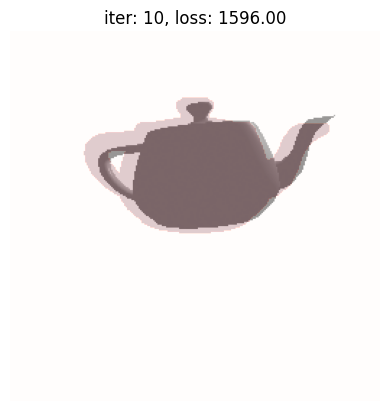

 80%|████████  | 12/15 [01:56<00:28,  9.43s/it]

iteration: 11, loss: 1796.141845703125


 87%|████████▋ | 13/15 [02:05<00:18,  9.35s/it]

iteration: 12, loss: 2010.3111572265625


 93%|█████████▎| 14/15 [02:14<00:09,  9.25s/it]

iteration: 13, loss: 2078.311767578125


100%|██████████| 15/15 [02:23<00:00,  9.55s/it]

iteration: 14, loss: 3370.547119140625


In [6]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 15, device)

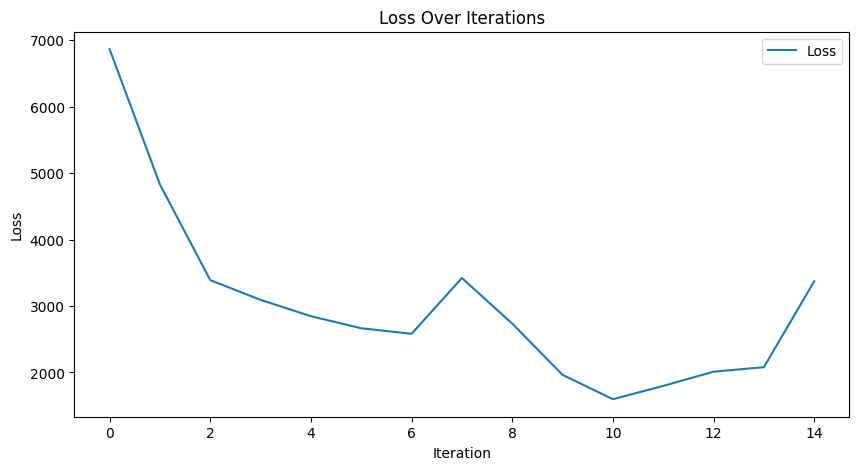

In [10]:
plot_losses(losses)

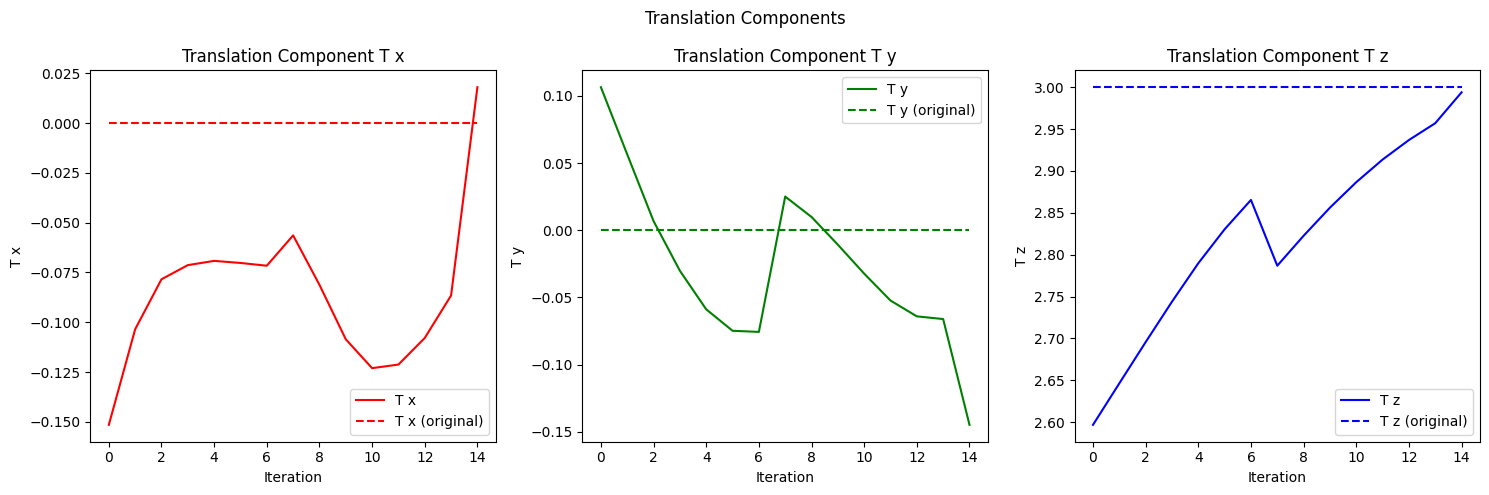

In [7]:
plot_translations(T_gt, parameter_updates)

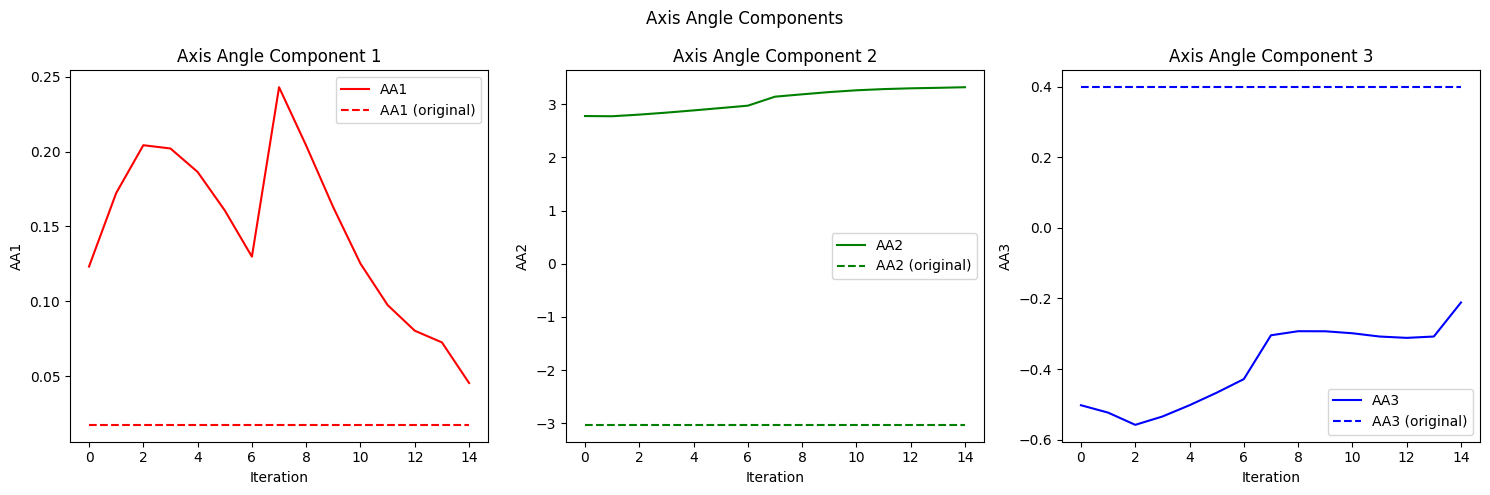

In [8]:
plot_axis_angles(R_gt, parameter_updates)